In [30]:
#manage image array
import cv2
import math


#save to json format
import json

#manage and visualize data
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import ast
from IPython.display import Image


# explore evaluate set

## explore

In [2]:
#at /Users/kunkerdthaisong/ipu/intern/shape_data/images
eval_df=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/ground_truth.csv")
eval_df["counts"]=eval_df["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))  #ex eval_df["counts"][0] is '[1 1 2]' so turn it to list
eval_df #counts[0] => [1,1,2] means num square=1,circle=1,triangle=2

,name,counts
0,random_shapes_0.png,"[1, 1, 2]"
1,random_shapes_1.png,"[0, 1, 1]"
2,random_shapes_10.png,"[1, 1, 0]"
3,random_shapes_11.png,"[1, 1, 1]"
4,random_shapes_12.png,"[0, 2, 1]"
...,...,...
95,random_shapes_95.png,"[2, 1, 0]"
96,random_shapes_96.png,"[1, 1, 2]"
97,random_shapes_97.png,"[0, 0, 2]"
98,random_shapes_98.png,"[2, 1, 0]"


In [155]:
#collect numbers of shapes in evaluate set

num_s,num_c,num_t=0,0,0
num_obs_per_image=[0,0,0,0,0]
for l in eval_df["counts"]:
    num_s+=l[0]
    num_c+=l[1]
    num_t+=l[2]
    
    count=0 # Count number of shapes in an images got 5 types=> contain 1,2,3,4,5 shapes in an image
    for v in l:
        if v!=0:
            count+=v
    num_obs_per_image[count-1]+=1
num_obs_per_image

[4, 40, 30, 20, 6]

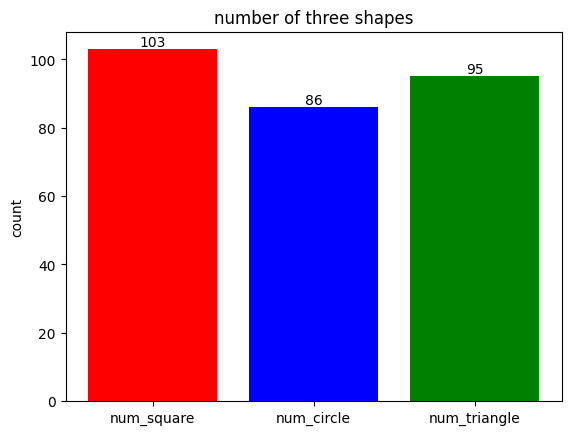

In [159]:
#plots numbers of shapes in evaluate set

names=["num_square","num_circle","num_triangle"]
colors = ['red', 'blue', 'green']

plt.bar(names,[num_s,num_c,num_t], color=colors)

# Adding values on top of each bar
for i, value in enumerate([num_s,num_c,num_t]):
    plt.text(i,y=value,s=str(value), ha='center', va='bottom')

plt.ylabel('count')
plt.title('number of three shapes')
plt.show()

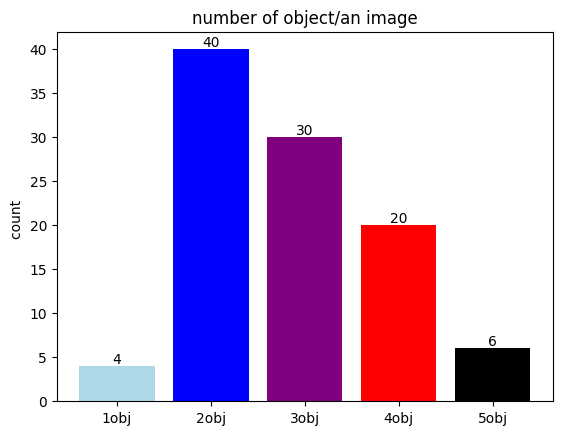

In [160]:
#plots numbers of object/an image in evaluate set

names=["1obj","2obj","3obj","4obj","5obj"]
colors = ["lightblue", "blue", "purple", "red", "black"]

plt.bar(names,num_obs_per_image, color=colors)

# Adding values on top of each bar
for i, value in enumerate(num_obs_per_image):
    plt.text(i,y=value,s=str(value), ha='center', va='bottom')

plt.ylabel('count ')
plt.title('number of object/an image')
plt.show()

In [128]:
#find type of triangle


def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

img = cv2.imread("/Users/kunkerdthaisong/ipu/intern/shape_data/images/random_shapes_23.png")

point1 = (45, 165)
point2 = (117, 165)

point3 = (int((45+118)/2), 165)
point4 = (int((45+118)/2), 165-(118-45))
point5 = (int((45+118)/2), 165-(118-45)-20)



point6 = (151, 222)
point7 = (238, 222)

point8 = (int((151+238)/2), 222)
point9 = (int((151+238)/2), 222-(151)+38)

cv2.line(img, point1, point2, (0, 0, 255), 2)
cv2.line(img, point3, point4, (0, 0, 255), 2)
cv2.line(img, point4, point5, (50, 140, 55), 2)


cv2.line(img, point6, point7, (0, 0, 255), 2)
cv2.line(img, point8, point9, (50, 140, 55), 2)


width = calculate_distance(point1, point2)
height=calculate_distance(point3,point5)

width2=calculate_distance(point6, point7)
height2=calculate_distance(point8, point9)


font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, f'w: {width:.2f}', (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(img, f'h: {height:.2f}', (50, 75), font, 1, (0, 0, 255),2, cv2.LINE_AA)


cv2.putText(img, f'w2: {width2:.2f}', (160, 250), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(img, f'h2: {height2:.2f}', (160, 290), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

cv2.putText(img, f'h/w: {height2/width2:.2f}', (160, 100), font, 1, (0, 191, 255), 2, cv2.LINE_AA)


cv2.imwrite("/Users/kunkerdthaisong/ipu/intern/measure.png",img)

True

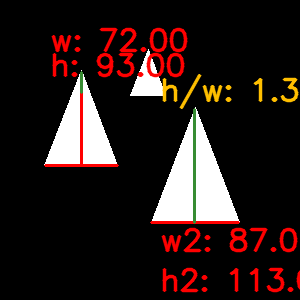

In [129]:
# so every triangles has same ratio of h/w which is 1.3 and being isosceles triangle
Image(filename="/Users/kunkerdthaisong/ipu/intern/measure.png")

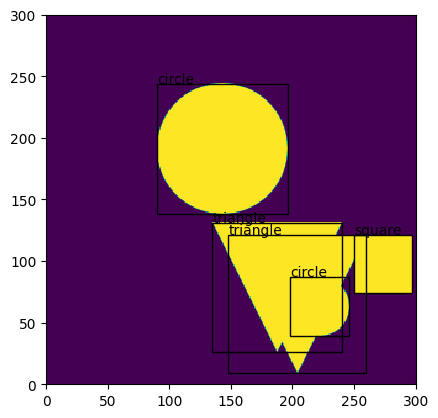

In [140]:
# visualize bbox and image after generate


path='/Users/kunkerdthaisong/ipu/intern/generated_img/numObs5/numObs5_0.png'
imgs=cv2.imread(path)
imgs=cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)

with open("/Users/kunkerdthaisong/ipu/intern/numObjects5.json","r") as json_file:
    data=json.load(json_file)

cl1=data.get(path)
shape_labels=['square','circle','triangle']
plt.imshow(imgs, interpolation='none', origin='lower', extent=[0,300, 0,300])
for bbox, shape in zip(cl1['bboxes'], cl1['shapes']):
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='k', fc='none'))
    plt.annotate(shape_labels[shape], (bbox[0], bbox[1] + bbox[3] + 0.7), clip_on=False)#


## critical case

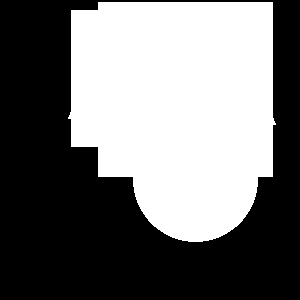

In [152]:
#on evaluate set
# counts 2 square,1 circle,2 triangle
#difficult to detect

Image(filename="/Users/kunkerdthaisong/ipu/intern/shape_data/images/random_shapes_16.png")

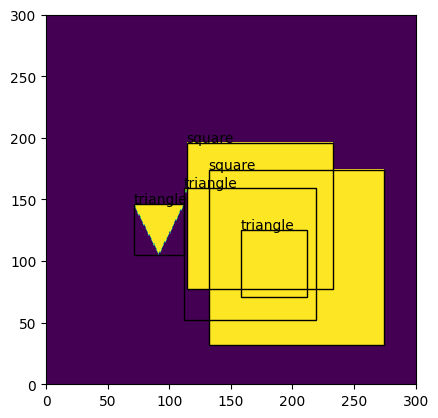

In [150]:
#some images after generate
# as you can see two triangle were obsecured by two square

path='/Users/kunkerdthaisong/ipu/intern/generated_img/numObs5/numObs5_5.png'
imgs=cv2.imread(path)
imgs=cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)

with open("/Users/kunkerdthaisong/ipu/intern/numObjects5.json","r") as json_file:
    data=json.load(json_file)

cl1=data.get(path)
shape_labels=['square','circle','triangle']
plt.imshow(imgs, interpolation='none', origin='lower', extent=[0,300, 0,300])
for bbox, shape in zip(cl1['bboxes'], cl1['shapes']):
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='k', fc='none'))
    plt.annotate(shape_labels[shape], (bbox[0], bbox[1] + bbox[3] + 0.7), clip_on=False)#

# generate strategy

In [ ]:
#1. We should gen images and bbox not larger than image size==300 and not less than 0.
#2. Generate balance type of numbObs(1 to 5) ex 2000 imgs for numObs1,2000 imgs for numObs2,......
    #2.1 2000*5 imgs
    #2.2 5000*5 imgs
    #2.3 1000*5 imgs support theory the smaller number of images the smaller chance that some shapes will be obcecured.
#3. To Generate shapes the size should between (7,150) by briefly.
#4. All shapes have the same type ex: circle,square and triangle is the same type so we should gen same type and ratio but only adjust the size and location of it.
#5. Generate bbox in yolo format.

# training strategy

## yolo

In [ ]:
#1. Use yolov8 n or m ,personally my machine was limited to the n size.
#2. hyperparameters
    #2.1 Use defualt hyperparameters.
    #2.1 Use dropout=0.1,hsv_v=0,hsv_h=0,hsv_s=0,translate=0,scale=0,fliplr=0.4,erasing=0.5,crop_fraction=1  fixed the hsv and translate to 0 B/C it useless to grayscale image(technically .png is rbg) and add dropout==0.1 to reduce overfit.
#3. Epochs
    #3.1 15 by experimets and limitation of resources (mac m2,ram 8Gb,mem 256Gb).
    #3.2 10 by reduce overfiting.


# how to evaluate?

In [ ]:
#1. Evaluate on evaluate set 100 images
#2. what matrics(only focus on the number of shapes) 
    #2.1 Accuracy after do MultiLabelBinarizer on ground_truth and result
    #2.2 Mean absolute error after do MultiLabelBinarizer on ground_truth and result
#3. Prediction (to get more score on evaluate set)
    #3.1 Change confident(conf=0.45 to 0.95).
    #3.2 Use TTA(test time augmentation) augment an image then predict it and vote their class and bbx of it.